In [28]:
# Mounting the google drive to get the images

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
# Importing some useful libraries and scripts

import pandas as pd # For dataframe related tasks
import numpy as np # For numerical tasks

import pickle # For saving our model

# For data visualization
import seaborn as sns 
import matplotlib.pyplot as plt

# Removing warning maessages
import warnings
warnings.filterwarnings('ignore')

# For train test spliting while training our model
from sklearn.model_selection import train_test_split

# A module for model training
from sklearn.linear_model import LogisticRegression

# A module for accuracy score checking
from sklearn.metrics import accuracy_score

In [30]:
# Specifying the location for all our data is located

data_folder_path = 'drive/MyDrive/AI_project_data'

In [31]:
# Reading our data

df = pd.read_csv(data_folder_path + '/heart_disease_data.csv')
df.head()    

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [32]:
# Checking for missing values

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [33]:
# Checking skewness of the data

df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

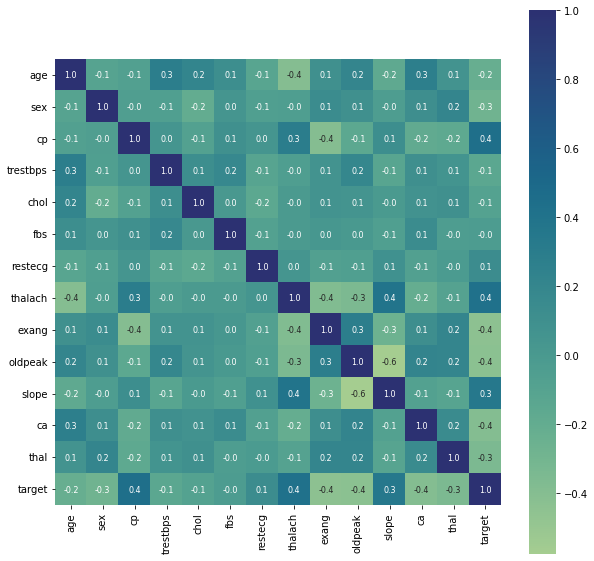

In [34]:
# Plotting the graph of overall relation

plt.figure(figsize = (10,10))
corr = df.corr()
sns.heatmap(corr,cbar=True,
            square = True,
            fmt = '.1f',
            annot = True,
            annot_kws = {'size':8},
            cmap = 'crest')

In [35]:
# Feature target extraction

X = df.drop(columns = 'target',axis = 1)
y = df['target']

In [36]:
# Lets see their shapes

print(X.shape,y.shape)

(303, 13) (303,)


In [37]:
'''
 Train test splitting using (80,20) ratio
 We used the argument stratify to have a standardized train test split
 i.e. the train set will have a balanced 0 and 1 ratio
'''

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    stratify = y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [38]:
# Initializing and training the Ensemble model

model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [39]:
# Checking the training set accuracy 

pred = model.predict(X_train)
accuracy = round(accuracy_score(pred,y_train),2)
print(f'Accuracy of the training set is: {int(accuracy * 100)}%')

Accuracy of the training set is: 84%


In [40]:
# Checking the test set accuracy to check if there is any overfitting

pred = model.predict(X_test)
accuracy = round(accuracy_score(pred,y_test),2)
print(f'Accuracy of the test set is: {int(accuracy * 100)}%')

Accuracy of the test set is: 80%


In [41]:
# Lets take some values in the test set and predict

check_data = X_test[:5]
prediction = model.predict(check_data)

In [42]:
# Checking the accuracy of our sampled data

accurate_results = np.array(prediction == y_test[:5],dtype=int)
print('The model accurately predicted {} out of {}'.format(
    np.sum(accurate_results),
    len(accurate_results)
))

The model accurately predicted 3 out of 5


In [46]:
# Saving the model 

file_name = 'models/heart_disease_model.h5'
with open(file_name,'wb') as f:
  pickle.dump(model,f)